In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tueplots import bundles, axes,figsizes, fonts, fontsizes
import matplotlib.font_manager

In [2]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)




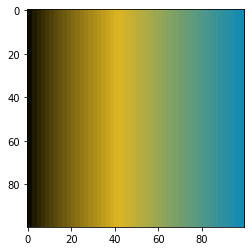

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ["#0c0b00","#deb522","#128bb5"] # first color is black, last is red
cm = LinearSegmentedColormap.from_list("Custom", colors, N=50, gamma=0.8)
mat = np.indices((100,100))[1]
plt.imshow(mat, cmap=cm)
plt.show()

In [4]:

def scatter_hist(x1, x2, y, ax1, ax2, ax_histx1, ax_histx2, ax_histy):
    
    x1_sort_idx = np.abs(x1-y).argsort()
    x2_sort_idx = np.abs(x2-y).argsort()

    
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histx2.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    vmin, vmax = 0, 2
    
    normalize = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    sc1 = ax1.scatter(x1[x1_sort_idx[::-1]], y[x1_sort_idx[::-1]], c=np.abs(x1-y)[x1_sort_idx[::-1]], norm=normalize, cmap=cm, s=3)
    sc2 = ax2.scatter(x2[x2_sort_idx[::-1]], y[x2_sort_idx[::-1]], c=np.abs(x2-y)[x2_sort_idx[::-1]], norm=normalize, cmap=cm, s=3)
    
    
    cbar = plt.colorbar(sc1, use_gridspec=True, ticks=[0,0.5,1,1.5,2])
    cbar.ax.set_yticklabels(["0","0.5","1","1.5","$>2$"])
    cbar.ax.set_ylabel("Absolute Error")
    
   
    ax1.set_xlim([3,9.5])
    ax2.set_xlim([3,9.5])
    ax1.set_ylim([1.,9.5])
    ax2.set_ylim([1.,9.5])
    
    
    ax_histy.set_ylim([1.5,9.5])
    
    
    ax1.set_xticks(ticks=[4,6,8], labels=None)
    ax2.set_xticks(ticks=[4,6,8], labels=None)
    ax1.set_yticks(ticks=[2,4,6,8], labels=None)
    ax2.set_yticks([])
    
    
    
    ax1.set_ylabel("True Ratings")
    ax1.set_xlabel("(a) Logistic Regression - MAE")
    ax2.set_xlabel("(2) ReLU-Net - Depth 6")
    

    bins = 25
    
    ax_histx1 = sns.distplot(x1, ax=ax_histx1, color="#deb522",bins=bins)
    ax_histx2 = sns.distplot(x2, ax=ax_histx2, color="#128bb5",bins=bins)
    ax_histy = sns.distplot(y, ax=ax_histy, color="#000000", vertical=True,bins=bins)
    
    #ax_histx.hist(x, bins=bins, color = "#deb522")
    
    
    for a in [ax_histx1, ax_histx2]:
        
        a.set_yticks([])
        a.set_ylabel("")

        a.spines['top'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['bottom'].set_visible(False)
    
    
    ax_histy.set_yticks([])
    ax_histy.set_xticks([])
    ax_histy.set_xlabel("")
    
    
    
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    
    return ax1, ax2, ax_histx1, ax_histx2, ax_histy

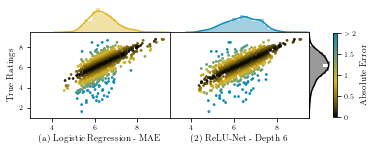

In [9]:


#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 9,
          'font.family' : 'sans'
          }
plt.rcParams.update(params) 
plt.rcParams.update(fontsizes.neurips2021()) 


x1 = np.load("./data_fig1/pred_lr.npy")
x2 = np.load("./data_fig1/pred_relu.npy")
y = np.load("./data_fig1/true_ratings.npy")



# definitions for the axes
left, width = 0.1, 0.8
bottom, height = 0.1, 0.6
spacing = 0.0
hist_size = 0.2



rect_scatter1 = [left, bottom, width, height]
rect_scatter2 = [left+width, bottom, width, height]

rect_histx1 = [left, bottom + height + spacing, width, hist_size]
rect_histx2 = [left+ width, bottom + height + spacing, width, hist_size]
rect_histy = [left + 2*width + spacing, bottom, hist_size, height]

# start with a square Figure
#fig = plt.figure(figsize=(4, 4)) 5.499999861629998, 2.266124568404705
fig, ax = plt.subplots(2,3, gridspec_kw={'height_ratios': [0.15, 0.5],'width_ratios': [0.5,0.5,0.1]}, figsize=set_size(397.48499, fraction=1, subplots=(1.5, 2.5)))

ax[1,0].get_shared_x_axes().join(ax[1,0], ax[1,1], ax[0,0], ax[0,1])
ax[1,0].get_shared_y_axes().join(ax[1,0], ax[1,1])
ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,1])

ax[0,2].axis('off')
scatter_hist(x1, x2, y, ax[1,0], ax[1,1], ax[0,0], ax[0,1], ax[1,2])

plt.subplots_adjust(wspace=0, hspace=0)

# 397.48499p
plt.savefig("fig1.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight',  pad_inches=0.
            )

plt.savefig("fig1.png", bbox_inches='tight', pad_inches=0., facecolor='white', dpi=1000)

plt.show()

